In [1]:
import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from projects.ephys.population import Population

In [2]:
from src.utils.path import find
from src.utils.auxiliary import flatten_series
from scipy.interpolate import interp1d
from scipy.stats import linregress

In [3]:
%matplotlib inline

In [4]:
mpl.rcParams.update({'font.size': 13})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [5]:
hffm_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm'
hffm = Population(savepath=hffm_savepath)
hffm.load(fname='hffm_pop2')

reading from /home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm/hffm_pop2.pickle


In [6]:
ltdk_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/021022/ltdk'
ltdk = Population(savepath=ltdk_savepath)
ltdk.load(fname='ltdk_pop2')

reading from /home/niell_lab/data/freely_moving_ephys/batch_files/021022/ltdk/ltdk_pop2.pickle


In [7]:
# ltdk.exptype = 'ltdk'
# ltdk.summarize_population()
# ltdk.save(fname='ltdk_pop2')

clustering by waveform
movement tuning
dEye clustering
saving to /home/niell_lab/data/freely_moving_ephys/batch_files/021022/ltdk/ltdk_pop2.pickle


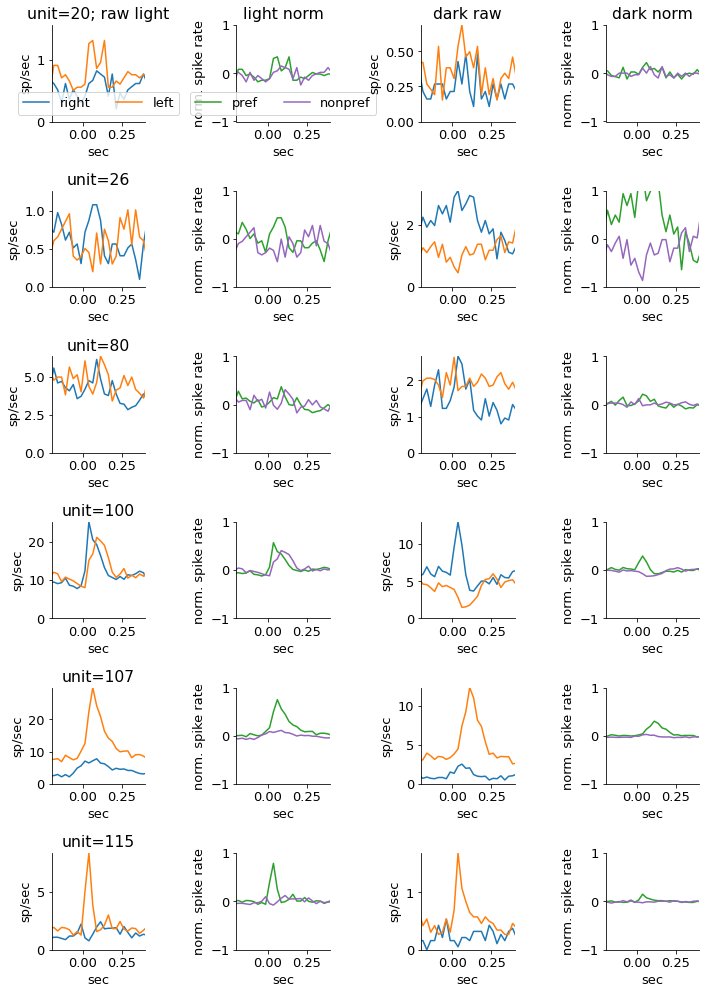

In [19]:
plt.subplots(6,4,figsize=(10,14))

c = 1
for i, ind in enumerate(units.index.values):
    row = units.iloc[i]
    
    plt.subplot(6,4,c)
    
    plt.plot(ltdk.trange_x, row['FmLt_rightsacc_avg_gaze_shift_dEye'], color='tab:blue', label='right')
    plt.plot(ltdk.trange_x, row['FmLt_leftsacc_avg_gaze_shift_dEye'], color='tab:orange', label='left')
    plt.ylim([0,np.max([row['FmLt_rightsacc_avg_gaze_shift_dEye'], row['FmLt_leftsacc_avg_gaze_shift_dEye']])])
    plt.xlim([-0.2,0.4])
    plt.ylabel('sp/sec')
    plt.xlabel('sec')
    if c==1:
        plt.legend(ncol=2, loc=8)
        plt.title('unit={}; raw light'.format(row['index']))
    else:
        plt.title('unit={}'.format(row['index']))
    c += 1
    
    plt.subplot(6,4,c)
    plt.plot(ltdk.trange_x, row['pref_gazeshift_psth'], color='tab:green', label='pref')
    plt.plot(ltdk.trange_x, row['nonpref_gazeshift_psth'], color='tab:purple', label='nonpref')
    plt.xlim([-0.2,0.4]); plt.ylim([-1,1])
    plt.ylabel('norm. spike rate')
    plt.xlabel('sec')
    if c==2:
        plt.legend(ncol=2, loc=8)
        plt.title('light norm')
    c += 1
    
    plt.subplot(6,4,c)
    plt.plot(ltdk.trange_x, row['FmDk_rightsacc_avg_gaze_shift_dEye'], color='tab:blue', label='right')
    plt.plot(ltdk.trange_x, row['FmDk_leftsacc_avg_gaze_shift_dEye'], color='tab:orange', label='left')
    plt.ylim([0,np.max([row['FmDk_rightsacc_avg_gaze_shift_dEye'], row['FmDk_leftsacc_avg_gaze_shift_dEye']])])
    plt.xlim([-0.2,0.4])
    plt.ylabel('sp/sec')
    plt.xlabel('sec')
    if c==3:
        plt.title('dark raw')
    c += 1
    
    plt.subplot(6,4,c)
    plt.plot(ltdk.trange_x, row['pref_gazeshift_psth_FmDk'], color='tab:green', label='pref')
    plt.plot(ltdk.trange_x, row['nonpref_gazeshift_psth_FmDk'], color='tab:purple', label='nonpref')
    plt.xlim([-0.2,0.4]); plt.ylim([-1,1])
    plt.ylabel('norm. spike rate')
    plt.xlabel('sec')
    if c==4:
        plt.title('dark norm')
    c += 1

plt.tight_layout()

In [7]:
def to_color(r,g,b):
    return (r/255, g/255, b/255)

In [8]:
# all, early, late, biphasic, negative, unresp., early-motor
hffm.cmap_movclusts = ['k', to_color(82,74,208), to_color(216,57,144), to_color(44,140,109), to_color(230,135,45), 'dimgray', to_color(145,140,247)]
ltdk.cmap_movclusts = hffm.cmap_movclusts

# Figure 1: four eye movement clusters

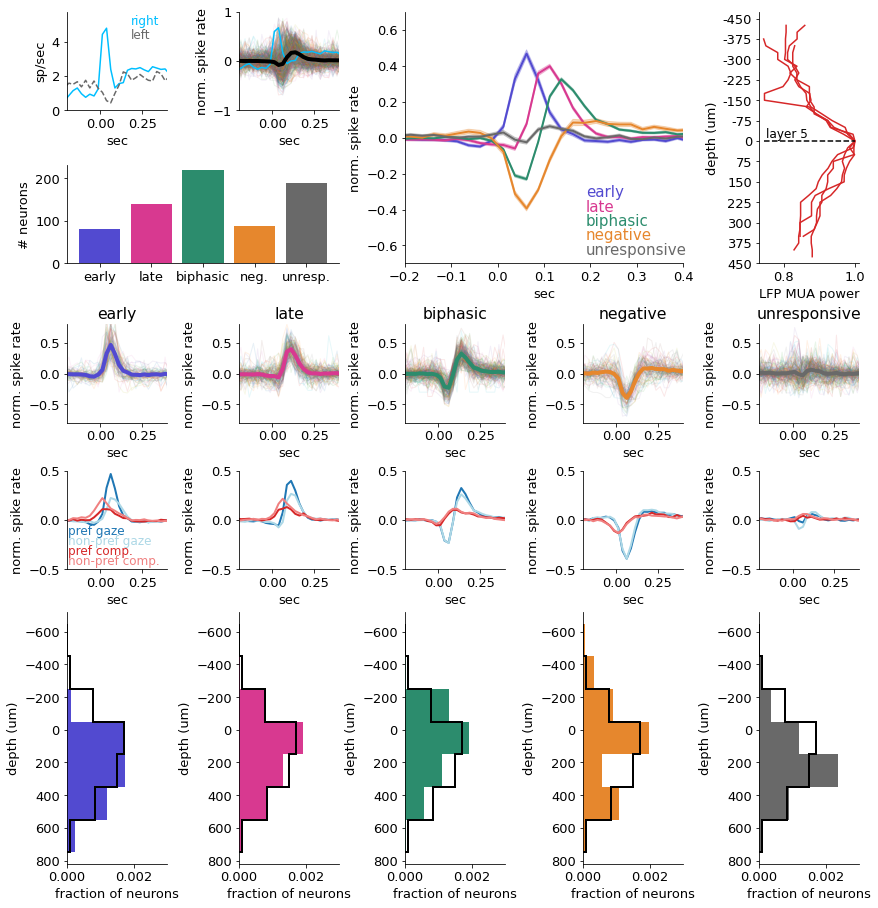

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(12,12.5))
spec = gridspec.GridSpec(nrows=6, ncols=5, figure=fig)

ax_ex_psth = fig.add_subplot(spec[0,0])
# ax_norm_demo = fig.add_subplot(spec[0,1])
ax_all_norm = fig.add_subplot(spec[0,1])
# ax_frac_resp = fig.add_subplot(spec[1,0])
ax_cluster_sz = fig.add_subplot(spec[1,0:2])
ax_four_clusters = fig.add_subplot(spec[0:2,2:4])
ax_ex_depth = fig.add_subplot(spec[0:2,4])

ax_early = fig.add_subplot(spec[2,0])
ax_late = fig.add_subplot(spec[2,1])
ax_biphasic = fig.add_subplot(spec[2,2])
ax_negative = fig.add_subplot(spec[2,3])
ax_unresp = fig.add_subplot(spec[2,4])

ax_early_pnp = fig.add_subplot(spec[3,0])
ax_late_pnp = fig.add_subplot(spec[3,1])
ax_biphasic_pnp = fig.add_subplot(spec[3,2])
ax_negative_pnp = fig.add_subplot(spec[3,3])
ax_unresp_pnp = fig.add_subplot(spec[3,4])

ax_early_depth = fig.add_subplot(spec[4:6,0])
ax_late_depth = fig.add_subplot(spec[4:6,1])
ax_biphasic_depth = fig.add_subplot(spec[4:6,2])
ax_negative_depth = fig.add_subplot(spec[4:6,3])
ax_unresp_depth = fig.add_subplot(spec[4:6,4])

ex_unit = 474
right = hffm.data['FmLt_rightsacc_avg_gaze_shift_dEye'][hffm.data['session']=='102621_J558NC_control_Rig2'][hffm.data['index']==ex_unit].iloc[0]
left = hffm.data['FmLt_leftsacc_avg_gaze_shift_dEye'][hffm.data['session']=='102621_J558NC_control_Rig2'][hffm.data['index']==ex_unit].iloc[0]
ax_ex_psth.plot(hffm.trange_x, right, color=hffm.cmap_special2[1])
ax_ex_psth.plot(hffm.trange_x, left, color='dimgray', linestyle='dashed')
maxval = np.max(np.maximum(right, left))*1.2
ax_ex_psth.set_ylim([0, maxval])
ax_ex_psth.set_xlim([-0.2, 0.4])
ax_ex_psth.set_ylabel('sp/sec')
ax_ex_psth.set_xlabel('sec')
# ax_ex_psth.set_title('Example gaze-shift PSTH')
ax_ex_psth.annotate('right', xy=[0.18,5], color=hffm.cmap_special2[1], fontsize=12)
ax_ex_psth.annotate('left', xy=[0.18,4.2], color='dimgray', fontsize=12)

pref = hffm.data['pref_gazeshift_psth'][hffm.data['session']=='102621_J558NC_control_Rig2'][hffm.data['index']==ex_unit].iloc[0]
# nonpref = hffm.data['nonpref_gazeshift_psth'][hffm.data['session']=='102621_J558NC_control_Rig2'][hffm.data['index']==ex_unit].iloc[0]
# ax_norm_demo.plot(hffm.trange_x, pref, color=hffm.cmap_special2[1])
# ax_norm_demo.plot(hffm.trange_x, nonpref, color=hffm.cmap_special2[0])
# ax_norm_demo.set_ylim([-1, 1])
# ax_norm_demo.set_xlim([-0.2, 0.4])
# ax_norm_demo.set_ylabel('norm. spike rate')
# ax_norm_demo.set_xlabel('sec')
# # ax_ex_psth.set_title('Example gaze-shift PSTH')
# ax_norm_demo.annotate('pref', xy=[0.18,.8], color=hffm.cmap_special2[1], fontsize=12)
# ax_norm_demo.annotate('non-pref', xy=[0.18,0.55], color=hffm.cmap_special2[0], fontsize=12)

allpsth = hffm.data['pref_gazeshift_psth'][hffm.data['movcluster'].isin(['early','late','biphasic','negative','unresponsive'])]
for ind, psth in allpsth.iteritems():
    ax_all_norm.plot(hffm.trange_x, psth, linewidth=1, alpha=0.1)
ax_all_norm.set_ylim([-1,1]); ax_all_norm.set_xlim([-0.2,0.4])
ax_all_norm.plot(hffm.trange_x, pref, color=hffm.cmap_special2[1])
ax_all_norm.plot(hffm.trange_x, np.mean(flatten_series(allpsth),0), 'k', linewidth=4)
ax_all_norm.set_ylabel('norm. spike rate')
ax_all_norm.set_xlabel('sec')

vcounts = hffm.data['movcluster'].value_counts()
names = ['early','late','biphasic','negative','unresponsive']
for i, name in enumerate(names):
    ax_cluster_sz.bar(i, vcounts[name], color=hffm.cmap_movclusts[i+1])
ax_cluster_sz.set_xticks(ticks=range(5), labels=['early','late','biphasic','neg.','unresp.'])
ax_cluster_sz.set_ylabel('# neurons')

for count, name in enumerate(names):
    cluster_psths = flatten_series(hffm.data['pref_gazeshift_psth'][hffm.data['movcluster']==name])
    clustmean = np.mean(cluster_psths, 0)
    clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
    ax_four_clusters.plot(hffm.trange_x, clustmean, '-', linewidth=2, color=hffm.cmap_movclusts[count+1])
    ax_four_clusters.fill_between(hffm.trange_x, clustmean-clusterr, clustmean+clusterr, color=hffm.cmap_movclusts[count+1], alpha=0.3)
ax_four_clusters.set_xlim([-0.2,0.4]); ax_four_clusters.set_ylim([-.7,.7])
ax_four_clusters.annotate('early', xy=[0.19,-0.33], color=hffm.cmap_movclusts[1], fontsize=15)
ax_four_clusters.annotate('late', xy=[0.19,-0.41], color=hffm.cmap_movclusts[2], fontsize=15)
ax_four_clusters.annotate('biphasic', xy=[0.19,-0.49], color=hffm.cmap_movclusts[3], fontsize=15)
ax_four_clusters.annotate('negative', xy=[0.19,-0.57], color=hffm.cmap_movclusts[4], fontsize=15)
ax_four_clusters.annotate('unresponsive', xy=[0.19,-0.65], color=hffm.cmap_movclusts[5], fontsize=15)
ax_four_clusters.set_ylabel('norm. spike rate'); ax_four_clusters.set_xlabel('sec')

mua_power = hffm.data['Wn_lfp_power'][hffm.data['session']=='101521_J559NC_control_Rig2'].iloc[0]
layer5 = hffm.data['Wn_layer5cent_from_lfp'][hffm.data['session']=='101521_J559NC_control_Rig2'].iloc[0]
ch_spacing = 25
for sh in range(4):
    ax_ex_depth.plot(mua_power[sh], np.arange(0,32)-layer5[sh], 'tab:red')
# ax_ex_depth.set_title('example recording depth')
ax_ex_depth.hlines(0,np.min(mua_power),np.max(mua_power), 'k', linestyle='dashed')
ax_ex_depth.set_ylim([18,-19])
ax_ex_depth.set_yticks(ticks=np.arange(18,-19,-3), labels=(ch_spacing*np.arange(18,-19,-3)))
ax_ex_depth.set_ylabel('depth (um)'); ax_ex_depth.set_xlabel('LFP MUA power')
ax_ex_depth.annotate('layer 5', xy=[0.75, -.5], color='k', fontsize=12)

panels = [ax_early, ax_late, ax_biphasic, ax_negative, ax_unresp]
pnp_panels = [ax_early_pnp, ax_late_pnp, ax_biphasic_pnp, ax_negative_pnp, ax_unresp_pnp]
movtypes = ['early','late','biphasic','negative','unresponsive']
for count in range(5):
    panel = panels[count]
    movtype = movtypes[count]
    pnp_panel = pnp_panels[count]
    
    thisclust = hffm.data['pref_gazeshift_psth'][hffm.data['movcluster']==movtype]
    for i, psth in enumerate(thisclust):
        panel.plot(hffm.trange_x, psth, '-', linewidth=1, alpha=0.1)
    clustmean = np.nanmean(flatten_series(thisclust),0)
    panel.plot(hffm.trange_x, clustmean, '-', linewidth=4, color=hffm.cmap_movclusts[count+1])
    panel.set_xlim([-0.2,0.4]); panel.set_ylim([-.8,.8])
    panel.set_title(movtype)
    panel.set_ylabel('norm. spike rate'); panel.set_xlabel('sec')
#     panel.vlines(0,-.8,.8, colors='k', linestyle='dotted', alpha=0.3)
    
    gaze_pref = np.nanmean(flatten_series(hffm.data['pref_gazeshift_psth'][hffm.data['movcluster']==movtype]),0)
    gaze_nonpref = np.nanmean(flatten_series(hffm.data['nonpref_gazeshift_psth'][hffm.data['movcluster']==movtype]),0)
    comp_pref = np.nanmean(flatten_series(hffm.data['pref_comp_psth'][hffm.data['movcluster']==movtype]),0)
    comp_nonpref = np.nanmean(flatten_series(hffm.data['nonpref_comp_psth'][hffm.data['movcluster']==movtype]),0)
    
    pnp_panel.plot(hffm.trange_x, gaze_pref, '-', linewidth=2, color='tab:blue')
    pnp_panel.plot(hffm.trange_x, gaze_nonpref, '-', linewidth=2, color='lightblue')
    pnp_panel.plot(hffm.trange_x, comp_pref, '-', linewidth=2, color='tab:red')
    pnp_panel.plot(hffm.trange_x, comp_nonpref, '-', linewidth=2, color='lightcoral')
    pnp_panel.set_xlim([-0.2,0.4]); pnp_panel.set_ylim([-.5,.5])
    pnp_panel.set_ylabel('norm. spike rate'); pnp_panel.set_xlabel('sec')
    
ax_early_pnp.annotate('pref gaze', xy=[-.19,-.15], color='tab:blue', fontsize=12)
ax_early_pnp.annotate('non-pref gaze', xy=[-.19,-.25], color='lightblue', fontsize=12)
ax_early_pnp.annotate('pref comp.', xy=[-.19,-.35], color='tab:red', fontsize=12)
ax_early_pnp.annotate('non-pref comp.', xy=[-.19,-.45], color='lightcoral', fontsize=12)

panels = [ax_early_depth, ax_late_depth, ax_biphasic_depth, ax_negative_depth, ax_unresp_depth]
names = ['early','late','biphasic','negative','unresponsive']
for i, panel in enumerate(panels):
    name = names[i]
#     panel.set_title(name)
    panel.hist(hffm.data['Wn_depth_from_layer5'], color='k', bins=np.linspace(-650,750,8), orientation='horizontal', density=True, histtype='step', linewidth=2)
    panel.hist(hffm.data['Wn_depth_from_layer5'][hffm.data['movcluster']==name],
                        color=hffm.cmap_movclusts[i+1], bins=np.linspace(-650,750,8), orientation='horizontal', density=True, histtype='stepfilled')
    panel.set_ylabel('depth (um)')
    panel.set_xlabel('fraction of neurons')
    panel.invert_yaxis()
    panel.set_xlim(0,0.003)

fig.savefig('/home/niell_lab/Desktop/March2022_eyemov_summary/fig1.pdf')

# Figure 2: tuning properties

In [10]:
def plot_cprop_scatter(panel, prop_name, filter_by=[], row=None):
    for c, cluster in enumerate(cluster_names):
        if filter_by:
            for filt in filter_by:
                data = hffm.data[hffm.data[filt]==True]
        else:
            data = hffm.data.copy()
        data = data[prop_name][data['movcluster']==cluster]
        x_jitter = np.random.uniform(c-0.2, c+0.2, np.size(data,0))
        panel.plot(x_jitter, data, '.', color=hffm.cmap_movclusts[c+1])
        panel.hlines(np.mean(data), c-0.2, c+0.2, color='k', linewidth=4)
        panel.set_xticks(range(5), ['e','l','b','n','u'])
    if row is not None:
        panel.plot(cluster_names.index(row['movcluster']), row[prop_name], '*', color=hffm.cmap_movclusts[cluster_names.index(row['movcluster'])+1], markersize=15, markeredgecolor='k')

In [11]:
def modind(a, b):
    """
    value of 1 means a is more significant
    value of -1 means b is more significant
    """
    mi = (a - b) / (a + b)
    return mi

def direcpref_scatter_c(panel, xname, yname):
    for i in range(4):
        name = ['early','late','biphasic','negative'][i]
        x_mi = hffm.data[xname][hffm.data['movcluster']==name]
        y_mi = hffm.data[yname][hffm.data['movcluster']==name]
        panel.plot(x_mi, y_mi, '.', color=hffm.cmap_movclusts[i+1], markersize=8)
    panel.vlines(0,-1,1,linestyle='dotted',alpha=0.5, colors='k')
    panel.hlines(0,-1,1,linestyle='dotted',alpha=0.5, colors='k')

In [12]:
for ind, row in hffm.data[hffm.data['fr']>2].iterrows():
    if row['movcluster'] in ['early','late','biphasic','negative']:
        if row['pref_gazeshift_direction']=='L':
            pref_gaze = row['pref_gazeshift_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
            nonpref_gaze = row['nonpref_gazeshift_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
            pref_comp = row['pref_comp_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
            nonpref_comp= row['nonpref_comp_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
        elif row['pref_gazeshift_direction']=='R':
            pref_gaze = row['pref_gazeshift_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
            nonpref_gaze = row['nonpref_gazeshift_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
            pref_comp = row['pref_comp_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
            nonpref_comp= row['nonpref_comp_psth'][hffm.trange_win[0]:hffm.trange_win[1]]
        
        if row['pref_gazeshift_direction']=='L':
            left_gaze = pref_gaze; right_gaze = nonpref_gaze
            left_comp = pref_comp; right_comp = nonpref_comp
        elif row['pref_gazeshift_direction']=='R':
            right_gaze = pref_gaze; left_gaze = nonpref_gaze
            right_comp = pref_comp; left_comp = nonpref_comp
        
        hffm.data.at[ind, 'gaze_sacc_rlMI'] = modind(np.max(right_gaze), np.max(left_gaze))
        hffm.data.at[ind, 'comp_sacc_rlMI'] = modind(np.max(right_comp), np.max(left_comp))
        hffm.data.at[ind, 'gaze_sacc_pnpMI'] = modind(np.max(pref_gaze), np.max(nonpref_gaze))
        hffm.data.at[ind, 'comp_sacc_pnpMI'] = modind(np.max(pref_comp), np.max(nonpref_comp))
        
    if row['responsive_to_gratings']:
        ori = row['Gt_ori_tuning_mean_tf']
        best_sf = ori[:,np.argmax(np.mean(ori,0))]
        left_grat = best_sf[0]
        right_grat = best_sf[4]
        hffm.data.at[ind, 'gratings_rlMI'] = modind(right_grat, left_grat)

In [30]:
hffm.data['movcluster'][hffm.data['responsive_to_contrast']].value_counts()

biphasic        183
unresponsive    128
late            124
early            72
negative         72
Name: movcluster, dtype: int64

In [28]:
len(SBCs.index.values)

28

In [33]:
len(hffm.data[hffm.data['responsive_to_gratings']].index.values)

288

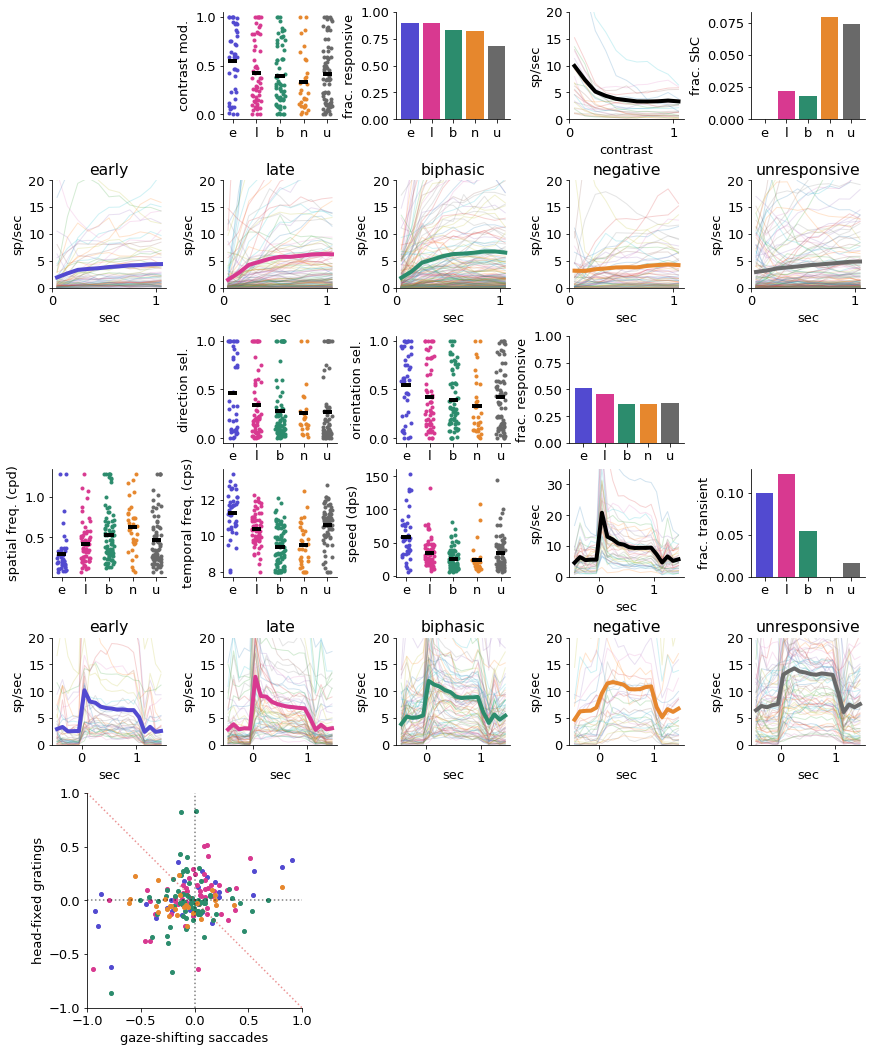

In [13]:
cluster_names = ['early','late','biphasic','negative','unresponsive']

fig = plt.figure(constrained_layout=True, figsize=(12,14.5))
spec = gridspec.GridSpec(nrows=7, ncols=5, figure=fig)

ax_cmi = fig.add_subplot(spec[0,1])
ax_contrast_frac = fig.add_subplot(spec[0,2])
# ax_avg_crf = fig.add_subplot(spec[0,3])
ax_sbc_psths = fig.add_subplot(spec[0,3])
ax_sbc_frac = fig.add_subplot(spec[0,4])

ax_crf_early = fig.add_subplot(spec[1,0])
ax_crf_late = fig.add_subplot(spec[1,1])
ax_crf_biphasic = fig.add_subplot(spec[1,2])
ax_crf_negative = fig.add_subplot(spec[1,3])
ax_crf_unresp = fig.add_subplot(spec[1,4])

ax_dsi = fig.add_subplot(spec[2,1])
ax_osi = fig.add_subplot(spec[2,2])
ax_gratings_frac = fig.add_subplot(spec[2,3])

ax_sf = fig.add_subplot(spec[3,0])
ax_tf = fig.add_subplot(spec[3,1])
ax_speed = fig.add_subplot(spec[3,2])

ax_trpsth = fig.add_subplot(spec[3,3])
ax_tr_fracs = fig.add_subplot(spec[3,4])

ax_GtPsth_early = fig.add_subplot(spec[4,0])
ax_GtPsth_late = fig.add_subplot(spec[4,1])
ax_GtPsth_biphasic = fig.add_subplot(spec[4,2])
ax_GtPsth_negative = fig.add_subplot(spec[4,3])
ax_GtPsth_unresp = fig.add_subplot(spec[4,4])

ax_LR_gaze_grat = fig.add_subplot(spec[5:7,0:2])

plot_cprop_scatter(ax_cmi, 'osi_for_sf_pref', filter_by=['responsive_to_gratings'])
ax_cmi.set_ylabel('contrast mod.')

cluster_vcounts = hffm.data['movcluster'].value_counts()
contrast_cluster_vcounts = hffm.data['movcluster'][hffm.data['responsive_to_contrast']].value_counts()
for i, name in enumerate(cluster_names):
    ax_contrast_frac.bar(i, contrast_cluster_vcounts[name]/cluster_vcounts[name], color=hffm.cmap_movclusts[1+i])
ax_contrast_frac.set_xticks(ticks=range(5), labels=['e','l','b','n','u'])
ax_contrast_frac.set_ylabel('frac. responsive')
ax_contrast_frac.set_ylim([0,1])

crf_panels = [ax_crf_early,ax_crf_late,ax_crf_biphasic,ax_crf_negative,ax_crf_unresp]
crf_bins = hffm.data.loc[0, 'Wn_contrast_tuning_bins']
for i, name in enumerate(cluster_names):
    avg_crf = flatten_series(hffm.data['Wn_contrast_tuning'][hffm.data['movcluster']==name][hffm.data['responsive_to_contrast']==True])
#     ax_avg_crf.plot(crf_bins, np.nanmean(avg_crf, 0), color=hffm.cmap_movclusts[1+i], linewidth=4)
#     ax_avg_crf.set_xlabel('contrast'); ax_avg_crf.set_ylabel('sp/sec')
    
    panel = crf_panels[i]
    panel.set_title(name)
    for psth in hffm.data['Wn_contrast_tuning'][hffm.data['movcluster']==name][hffm.data['responsive_to_contrast']==True]:
        panel.plot(crf_bins, psth, alpha=0.2, linewidth=1)
    panel.plot(crf_bins, np.nanmean(avg_crf, 0), color=hffm.cmap_movclusts[1+i], linewidth=4)
    panel.set_ylabel('sp/sec'); panel.set_xlabel('sec')
    panel.set_ylim([0,20])

SBCs = hffm.data[hffm.data['is_SbC']]
    
for ind, row in SBCs.iterrows():
    ax_sbc_psths.plot(row['Wn_contrast_tuning_bins'], row['Wn_contrast_tuning'], linewidth=1, alpha=0.2)
this_mean = np.nanmean(flatten_series(SBCs['Wn_contrast_tuning']),0)
ax_sbc_psths.plot(row['Wn_contrast_tuning_bins'], this_mean, color='k', linewidth=4)
ax_sbc_psths.set_ylim([0,20])
ax_sbc_psths.set_ylabel('sp/sec'); ax_sbc_psths.set_xlabel('contrast')

cluster_vcounts = hffm.data['movcluster'].value_counts()
contrast_cluster_vcounts = SBCs['movcluster'][SBCs['responsive_to_contrast']].value_counts()
for i, name in enumerate(cluster_names):
    if name not in contrast_cluster_vcounts:
        contrast_cluster_vcounts[name] = 0
    ax_sbc_frac.bar(i, contrast_cluster_vcounts[name]/cluster_vcounts[name], color=hffm.cmap_movclusts[1+i])
ax_sbc_frac.set_xticks(ticks=range(5), labels=['e','l','b','n','u'])
ax_sbc_frac.set_ylabel('frac. SbC')

###

cluster_vcounts = hffm.data['movcluster'].value_counts()
contrast_cluster_vcounts = hffm.data['movcluster'][hffm.data['responsive_to_gratings']].value_counts()
for i, name in enumerate(cluster_names):
    ax_gratings_frac.bar(i, contrast_cluster_vcounts[name]/cluster_vcounts[name], color=hffm.cmap_movclusts[1+i])
ax_gratings_frac.set_xticks(ticks=range(5), labels=['e','l','b','n','u'])
ax_gratings_frac.set_ylabel('frac. responsive')
ax_gratings_frac.set_ylim([0,1])

plot_cprop_scatter(ax_dsi, 'dsi_for_sf_pref', filter_by=['responsive_to_gratings'])
ax_dsi.set_ylabel('direction sel.')

plot_cprop_scatter(ax_osi, 'osi_for_sf_pref', filter_by=['responsive_to_gratings'])
ax_osi.set_ylabel('orientation sel.')

plot_cprop_scatter(ax_sf, 'sf_pref_cpd', filter_by=['responsive_to_gratings'])
ax_sf.set_ylabel('spatial freq. (cpd)')

plot_cprop_scatter(ax_tf, 'tf_pref_cps', filter_by=['responsive_to_gratings'])
ax_tf.set_ylabel('temporal freq. (cps)')

plot_cprop_scatter(ax_speed, 'grat_speed_dps', filter_by=['responsive_to_gratings'])
ax_speed.set_ylabel('speed (dps)')

trPsth = hffm.data[hffm.data['is_grat_trpsth']][hffm.data['responsive_to_gratings']]
sPsth = hffm.data[hffm.data['responsive_to_gratings']][hffm.data['is_grat_trpsth']==False]
for ind, psth in trPsth['Gt_grating_psth'].iteritems():
    ax_trpsth.plot(hffm.grat_psth_x, psth, alpha=.2, linewidth=1)
this_mean = np.nanmean(flatten_series(trPsth['Gt_grating_psth']),0)
ax_trpsth.plot(hffm.grat_psth_x, this_mean, color='k', linewidth=4)
ax_trpsth.set_ylim([0,35]); ax_trpsth.set_ylabel('sp/sec'); ax_trpsth.set_xlabel('sec')

SbC_vcounts = trPsth['movcluster'].value_counts()
names = ['early','late','biphasic','negative','unresponsive']
for n in names:
    if n not in SbC_vcounts.index.values:
        SbC_vcounts[n] = 0
for x, name in enumerate(names):
    ax_tr_fracs.bar(x, SbC_vcounts[name]/len(hffm.data[hffm.data['movcluster']==name]), color=hffm.cmap_movclusts[1+x])
ax_tr_fracs.set_xticks(ticks=range(len(names)), labels=['e','l','b','n','u'])
ax_tr_fracs.set_ylabel('frac. transient')

crf_panels = [ax_GtPsth_early,ax_GtPsth_late,ax_GtPsth_biphasic,ax_GtPsth_negative,ax_GtPsth_unresp]
for i, name in enumerate(cluster_names):
    avg_crf = flatten_series(hffm.data['Gt_grating_psth'][hffm.data['movcluster']==name][hffm.data['responsive_to_gratings']==True])
#     ax_avg_crf.plot(crf_bins, np.nanmean(avg_crf, 0), color=hffm.cmap_movclusts[1+i], linewidth=4)
#     ax_avg_crf.set_xlabel('contrast'); ax_avg_crf.set_ylabel('sp/sec')
    
    panel = crf_panels[i]
    panel.set_title(name)
    for psth in hffm.data['Gt_grating_psth'][hffm.data['movcluster']==name][hffm.data['responsive_to_gratings']==True]:
        panel.plot(hffm.grat_psth_x, psth, alpha=0.2, linewidth=1)
    panel.plot(hffm.grat_psth_x, np.nanmean(avg_crf, 0), color=hffm.cmap_movclusts[1+i], linewidth=4)
    panel.set_ylabel('sp/sec'); panel.set_xlabel('sec')
    panel.set_ylim([0,20])
    
direcpref_scatter_c(ax_LR_gaze_grat, 'gaze_sacc_rlMI', 'gratings_rlMI')
ax_LR_gaze_grat.set_ylabel('head-fixed gratings')
ax_LR_gaze_grat.set_xlabel('gaze-shifting saccades')
ax_LR_gaze_grat.set_xlim([-1,1]); ax_LR_gaze_grat.set_ylim([-1,1])
ax_LR_gaze_grat.set_aspect('equal','box')
ax_LR_gaze_grat.plot([-1,1],[1,-1],linestyle='dotted',alpha=0.5, color='tab:red')
ax_LR_gaze_grat.set_yticks(np.arange(-1,1.5,0.5)); ax_LR_gaze_grat.set_xticks(np.arange(-1,1.5,0.5))

fig.savefig('/home/niell_lab/Desktop/March2022_eyemov_summary/fig2.pdf')

In [31]:
len(trPsth.index.values)

40

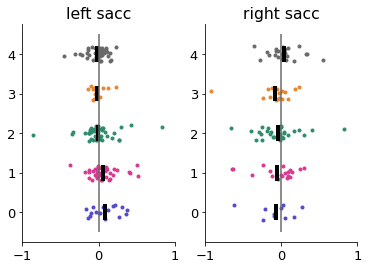

In [27]:
for lr in range(2):
    plt.subplot(1,2,lr+1)
    plt.title(['left sacc','right sacc'][lr])
    for c, name in enumerate(cluster_names):
        data = hffm.data['gratings_rlMI'][hffm.data['movcluster']==name][hffm.data['pref_comp_direction_ind']==lr][hffm.data['responsive_to_gratings']==True]
        y_jitter = np.random.uniform(c-0.2, c+0.2, np.size(data,0))
        plt.plot(data, y_jitter, '.', color=hffm.cmap_movclusts[c+1])
        plt.vlines(np.mean(data), c-0.2, c+0.2, color='k', linewidth=4)
    plt.xlim([-1,1])
    plt.vlines(0, -0.5,4.5, colors='dimgray')

# Figure 3: light/dark data

In [14]:
model_dt = 0.025
for ind, row in ltdk.data.iterrows():
    modelT = np.arange(0, np.nanmax(row['FmLt_eyeT']), model_dt)
    
    # timing is off sometimes... using eyeT instead of worldT to get maximum length
    # and they can be different by a few frames
    diff = len(modelT) - len(row['FmLt_rate'])
    if diff>0: # modelT is longer
        modelT = modelT[:-diff]
    elif diff<0: # modelT is shorted
        for i in range(np.abs(diff)):
            modelT = np.append(modelT, modelT[-1]+model_dt)
    model_gz = interp1d(row['FmLt_imuT'], row['FmLt_gyro_z'], bounds_error=False)(modelT)
    model_active = np.convolve(np.abs(model_gz), np.ones(int(1/model_dt)), 'same') / len(np.ones(int(1/model_dt)))
    ltdk.data.at[ind, 'FmLt_model_active'] = model_active.astype(object)
    ltdk.data.at[ind, 'FmLt_modelT'] = modelT.astype(object)
    
    modelT = np.arange(0, np.nanmax(row['FmDk_eyeT']), model_dt)
    diff = len(modelT) - len(row['FmDk_rate'])
    if diff>0: # modelT is longer
        modelT = modelT[:-diff]
    elif diff<0: # modelT is shorted
        for i in range(np.abs(diff)):
            modelT = np.append(modelT, modelT[-1]+model_dt)
    model_gz = interp1d(row['FmDk_imuT'], row['FmDk_gyro_z'], bounds_error=False)(modelT)
    model_active = np.convolve(np.abs(model_gz), np.ones(int(1/model_dt)), 'same') / len(np.ones(int(1/model_dt)))
    ltdk.data.at[ind, 'FmDk_model_active'] = model_active.astype(object)
    ltdk.data.at[ind, 'FmDk_modelT'] = modelT.astype(object)

In [15]:
ltdk.data['FmLt_fr'] = ((ltdk.data['FmLt_rate'].apply(np.sum)*0.025) / ltdk.data['FmLt_eyeT'].apply(np.nanmax)).to_numpy()
ltdk.data['FmDk_fr'] = ((ltdk.data['FmDk_rate'].apply(np.sum)*0.025) / ltdk.data['FmDk_eyeT'].apply(np.nanmax)).to_numpy()

In [16]:
FmLt_fr = np.zeros([len(ltdk.data.index.values)])
FmDk_fr = np.zeros([len(ltdk.data.index.values)])
for ind, row in ltdk.data.iterrows():
    ltdk.data.at[ind,'FmLt_active_fr'] = (np.sum(row['FmLt_rate'][row['FmLt_model_active']>40])) / np.size(row['FmLt_modelT'][row['FmLt_model_active']>40])
    ltdk.data.at[ind,'FmLt_inactive_fr'] = (np.sum(row['FmLt_rate'][row['FmLt_model_active']<40])) / np.size(row['FmLt_modelT'][row['FmLt_model_active']<40])
    ltdk.data.at[ind,'FmDk_active_fr'] = (np.sum(row['FmDk_rate'][row['FmDk_model_active']>40])) / np.size(row['FmDk_modelT'][row['FmDk_model_active']>40])
    ltdk.data.at[ind,'FmDk_inactive_fr'] = (np.sum(row['FmDk_rate'][row['FmDk_model_active']<40])) / np.size(row['FmDk_modelT'][row['FmDk_model_active']<40])

In [20]:
ltdk.data['dark_motor_early'] = False
for ind, row in ltdk.data[ltdk.data['movcluster']=='early'].iterrows():
    x = row['pref_gazeshift_psth_FmDk']
    zscore = (np.max(x[35:45]) - np.mean(x)) / (np.std(x))
    if zscore>4:
        ltdk.data.at[ind, 'dark_motor_early'] = True

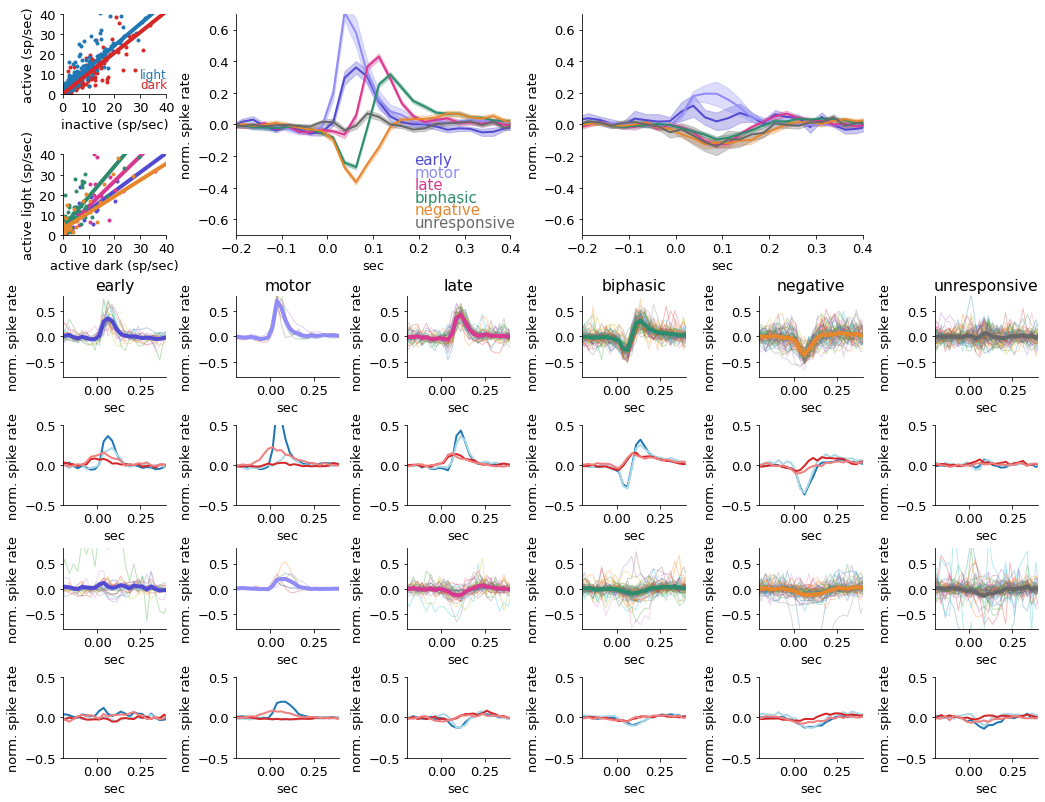

In [18]:
cluster_names = ['early','late','biphasic','negative','unresponsive']

fig = plt.figure(constrained_layout=True, figsize=(14.4,11))
spec = gridspec.GridSpec(nrows=6, ncols=6, figure=fig)

ax_active_fr = ax_early = fig.add_subplot(spec[0,0])
ax_cluster_fr = ax_early = fig.add_subplot(spec[1,0])

ax_light_summary = fig.add_subplot(spec[0:2,1:3])
ax_dark_summary = fig.add_subplot(spec[0:2,3:5])

ax_early = fig.add_subplot(spec[2,0])
ax_early_m = fig.add_subplot(spec[2,1])
ax_late = fig.add_subplot(spec[2,2])
ax_biphasic = fig.add_subplot(spec[2,3])
ax_negative = fig.add_subplot(spec[2,4])
ax_unresp = fig.add_subplot(spec[2,5])

ax_early_pnp = fig.add_subplot(spec[3,0])
ax_early_m_pnp = fig.add_subplot(spec[3,1])
ax_late_pnp = fig.add_subplot(spec[3,2])
ax_biphasic_pnp = fig.add_subplot(spec[3,3])
ax_negative_pnp = fig.add_subplot(spec[3,4])
ax_unresp_pnp = fig.add_subplot(spec[3,5])

ax_early_d = fig.add_subplot(spec[4,0])
ax_early_m_d = fig.add_subplot(spec[4,1])
ax_late_d = fig.add_subplot(spec[4,2])
ax_biphasic_d = fig.add_subplot(spec[4,3])
ax_negative_d = fig.add_subplot(spec[4,4])
ax_unresp_d = fig.add_subplot(spec[4,5])

ax_early_pnp_d = fig.add_subplot(spec[5,0])
ax_early_m_pnp_d = fig.add_subplot(spec[5,1])
ax_late_pnp_d = fig.add_subplot(spec[5,2])
ax_biphasic_pnp_d = fig.add_subplot(spec[5,3])
ax_negative_pnp_d = fig.add_subplot(spec[5,4])
ax_unresp_pnp_d = fig.add_subplot(spec[5,5])

ax_active_fr.plot(ltdk.data['FmDk_inactive_fr'], ltdk.data['FmDk_active_fr'], '.', color='tab:red')
ax_active_fr.plot(ltdk.data['FmLt_inactive_fr'], ltdk.data['FmLt_active_fr'], '.', color='tab:blue')
fit_dark = linregress(ltdk.data['FmDk_inactive_fr'], ltdk.data['FmDk_active_fr'])
fit_light = linregress(ltdk.data['FmLt_inactive_fr'], ltdk.data['FmLt_active_fr'])
ax_active_fr.plot([0,40],[fit_light.intercept, (40*fit_light.slope)+fit_light.intercept], linewidth=4, color='tab:blue')
ax_active_fr.plot([0,40],[fit_dark.intercept, (40*fit_dark.slope)+fit_dark.intercept], linewidth=4, color='tab:red')
ax_active_fr.set_xlabel('inactive (sp/sec)'); ax_active_fr.set_ylabel('active (sp/sec)')
ax_active_fr.annotate('light', xy=[30,8], color='tab:blue', fontsize=12)
ax_active_fr.annotate('dark', xy=[30,3], color='tab:red', fontsize=12)
ax_active_fr.set_xlim([0,40]); ax_active_fr.set_ylim([0,40])
ax_active_fr.set_xticks(np.linspace(0,40,5)); ax_active_fr.set_yticks(np.linspace(0,40,5))

for c, name in enumerate(cluster_names[:-1]):
    data = ltdk.data[ltdk.data['movcluster']==name]
    ax_cluster_fr.plot(data['FmDk_active_fr'], data['FmLt_active_fr'], '.', color=ltdk.cmap_movclusts[c+1])
    cfit = linregress(data['FmDk_active_fr'], data['FmLt_active_fr'])
    ax_cluster_fr.plot([0,40],[cfit.intercept, (40*cfit.slope)+cfit.intercept], linewidth=4, color=ltdk.cmap_movclusts[c+1])
ax_cluster_fr.set_xlabel('active dark (sp/sec)'); ax_cluster_fr.set_ylabel('active light (sp/sec)')
ax_cluster_fr.set_xlim([0,40]); ax_cluster_fr.set_ylim([0,40])
ax_cluster_fr.set_xticks(np.linspace(0,40,5)); ax_cluster_fr.set_yticks(np.linspace(0,40,5))

cluster_names_wM = ['early','early_m','late','biphasic','negative','unresponsive']
cmap_movclust_temp = [ltdk.cmap_movclusts[1], ltdk.cmap_movclusts[6]] + ltdk.cmap_movclusts[2:6]

for count, name in enumerate(cluster_names_wM):
    
    if name=='early_m':
        data = ltdk.data[ltdk.data['movcluster']=='early'][ltdk.data['dark_motor_early']==True]
        name = 'motor'
    elif name=='early':
        data = ltdk.data[ltdk.data['movcluster']=='early'][ltdk.data['dark_motor_early']==False]
    else:
        data = ltdk.data[ltdk.data['movcluster']==name]
    
    cluster_psths = flatten_series(data['pref_gazeshift_psth'])
    clustmean = np.mean(cluster_psths, 0)
    clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
    ax_light_summary.plot(ltdk.trange_x, clustmean, '-', linewidth=2, color=cmap_movclust_temp[count])
    ax_light_summary.fill_between(ltdk.trange_x, clustmean-clusterr, clustmean+clusterr, color=cmap_movclust_temp[count], alpha=0.3)
ax_light_summary.set_xlim([-0.2,0.4]); ax_light_summary.set_ylim([-.7,.7])
ax_light_summary.annotate('early', xy=[0.19,-0.25], color=cmap_movclust_temp[0], fontsize=15)
ax_light_summary.annotate('motor', xy=[0.19,-0.33], color=cmap_movclust_temp[1], fontsize=15)
ax_light_summary.annotate('late', xy=[0.19,-0.41], color=cmap_movclust_temp[2], fontsize=15)
ax_light_summary.annotate('biphasic', xy=[0.19,-0.49], color=cmap_movclust_temp[3], fontsize=15)
ax_light_summary.annotate('negative', xy=[0.19,-0.57], color=cmap_movclust_temp[4], fontsize=15)
ax_light_summary.annotate('unresponsive', xy=[0.19,-0.65], color=cmap_movclust_temp[5], fontsize=15)
ax_light_summary.set_ylabel('norm. spike rate'); ax_light_summary.set_xlabel('sec')

for count, name in enumerate(cluster_names_wM):
    if name=='early_m':
        data = ltdk.data[ltdk.data['movcluster']=='early'][ltdk.data['dark_motor_early']==True]
        name = 'motor'
    elif name=='early':
        data = ltdk.data[ltdk.data['movcluster']=='early'][ltdk.data['dark_motor_early']==False]
    else:
        data = ltdk.data[ltdk.data['movcluster']==name]
    
    cluster_psths = flatten_series(data['pref_gazeshift_psth_FmDk'])
    clustmean = np.mean(cluster_psths, 0)
    clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
    ax_dark_summary.plot(ltdk.trange_x, clustmean, '-', linewidth=2, color=cmap_movclust_temp[count])
    ax_dark_summary.fill_between(ltdk.trange_x, clustmean-clusterr, clustmean+clusterr, color=cmap_movclust_temp[count], alpha=0.3)
ax_dark_summary.set_xlim([-0.2,0.4]); ax_dark_summary.set_ylim([-.7,.7])
ax_dark_summary.set_ylabel('norm. spike rate'); ax_dark_summary.set_xlabel('sec')

panels = [ax_early, ax_early_m, ax_late, ax_biphasic, ax_negative, ax_unresp]
pnp_panels = [ax_early_pnp, ax_early_m_pnp, ax_late_pnp, ax_biphasic_pnp, ax_negative_pnp, ax_unresp_pnp]
dark_panels = [ax_early_d, ax_early_m_d, ax_late_d, ax_biphasic_d, ax_negative_d, ax_unresp_d]
dark_pnp_panels = [ax_early_pnp_d, ax_early_m_pnp_d, ax_late_pnp_d, ax_biphasic_pnp_d, ax_negative_pnp_d, ax_unresp_pnp_d]

for c, name in enumerate(cluster_names_wM):
    ax_light_psth = panels[c]
    ax_light_prefs = pnp_panels[c]
    ax_dark_psth = dark_panels[c]
    ax_dark_prefs = dark_pnp_panels[c]
    
    if name=='early_m':
        data = ltdk.data[ltdk.data['movcluster']=='early'][ltdk.data['dark_motor_early']==True]
        name = 'motor'
    elif name=='early':
        data = ltdk.data[ltdk.data['movcluster']=='early'][ltdk.data['dark_motor_early']==False]
    else:
        data = ltdk.data[ltdk.data['movcluster']==name]
    
    for x in data['pref_gazeshift_psth']:
        ax_light_psth.plot(ltdk.trange_x, x, '-', linewidth=1, alpha=0.3)
    ax_light_psth.plot(ltdk.trange_x, np.nanmean(flatten_series(data['pref_gazeshift_psth']),0), '-', linewidth=4, color=cmap_movclust_temp[c])
    ax_light_psth.set_xlim([-0.2,0.4]); ax_light_psth.set_ylim([-.8,.8])
    ax_light_psth.set_title(name)
    ax_light_psth.set_ylabel('norm. spike rate'); ax_light_psth.set_xlabel('sec')
    
    gaze_pref = np.nanmean(flatten_series(data['pref_gazeshift_psth']),0)
    gaze_nonpref = np.nanmean(flatten_series(data['nonpref_gazeshift_psth']),0)
    comp_pref = np.nanmean(flatten_series(data['pref_comp_psth']),0)
    comp_nonpref = np.nanmean(flatten_series(data['nonpref_comp_psth']),0)
    
    ax_light_prefs.plot(ltdk.trange_x, gaze_pref, '-', linewidth=2, color='tab:blue')
    ax_light_prefs.plot(ltdk.trange_x, gaze_nonpref, '-', linewidth=2, color='lightblue')
    ax_light_prefs.plot(ltdk.trange_x, comp_pref, '-', linewidth=2, color='tab:red')
    ax_light_prefs.plot(ltdk.trange_x, comp_nonpref, '-', linewidth=2, color='lightcoral')
    ax_light_prefs.set_xlim([-0.2,0.4]); ax_light_prefs.set_ylim([-.5,.5])
    ax_light_prefs.set_ylabel('norm. spike rate'); ax_light_prefs.set_xlabel('sec')
    
    for x in data['pref_gazeshift_psth_FmDk']:
        ax_dark_psth.plot(ltdk.trange_x, x, '-', linewidth=1, alpha=0.3)
    ax_dark_psth.plot(ltdk.trange_x, np.nanmean(flatten_series(data['pref_gazeshift_psth_FmDk']),0), '-', linewidth=4, color=cmap_movclust_temp[c])
    ax_dark_psth.set_xlim([-0.2,0.4]); ax_dark_psth.set_ylim([-.8,.8])
    ax_dark_psth.set_ylabel('norm. spike rate'); ax_dark_psth.set_xlabel('sec')
    
    gaze_pref = np.nanmean(flatten_series(data['pref_gazeshift_psth_FmDk']),0)
    gaze_nonpref = np.nanmean(flatten_series(data['nonpref_gazeshift_psth_FmDk']),0)
    comp_pref = np.nanmean(flatten_series(data['pref_comp_psth_FmDk']),0)
    comp_nonpref = np.nanmean(flatten_series(data['nonpref_comp_psth_FmDk']),0)
    
    ax_dark_prefs.plot(ltdk.trange_x, gaze_pref, '-', linewidth=2, color='tab:blue')
    ax_dark_prefs.plot(ltdk.trange_x, gaze_nonpref, '-', linewidth=2, color='lightblue')
    ax_dark_prefs.plot(ltdk.trange_x, comp_pref, '-', linewidth=2, color='tab:red')
    ax_dark_prefs.plot(ltdk.trange_x, comp_nonpref, '-', linewidth=2, color='lightcoral')
    ax_dark_prefs.set_xlim([-0.2,0.4]); ax_dark_prefs.set_ylim([-.5,.5])
    ax_dark_prefs.set_ylabel('norm. spike rate'); ax_dark_prefs.set_xlabel('sec')
    
fig.savefig('/home/niell_lab/Desktop/March2022_eyemov_summary/fig3.pdf')

# Figure 4: sparse noise & reversing checkerboard

In [19]:
def norm_PSTH(x, pref=None):
    if pref is None:
        pref = x.copy()
    return (x-np.nanmean(x)) / np.nanmax(np.abs(pref))

In [20]:
for ind, row in hffm.data.iterrows():
    hffm.data.at[ind, 'norm_Rc_psth'] = norm_PSTH(row['Rc_psth']).astype(object)
    
    if not np.isnan(row['Sn_on_background_psth']).all():
        Sn_selective_on = row['Sn_on_lightstim_psth'] - row['Sn_on_background_psth']
        hffm.data.at[ind, 'norm_Sn_selective_on'] = norm_PSTH(Sn_selective_on).astype(object)
        hffm.data.at[ind, 'norm_Sn_background_on'] = norm_PSTH(row['Sn_on_background_psth']).astype(object)
    if not np.isnan(row['Sn_off_background_psth']).all():
        Sn_selective_off = row['Sn_off_darkstim_psth'] - row['Sn_off_background_psth']
        hffm.data.at[ind, 'norm_Sn_selective_off'] = norm_PSTH(Sn_selective_off).astype(object)
        hffm.data.at[ind, 'norm_Sn_background_off'] = norm_PSTH(row['Sn_off_background_psth']).astype(object)
    if not np.isnan(row['Sn_on_all_psth']).all():
        hffm.data.at[ind, 'norm_Sn_on_all_psth'] = norm_PSTH(row['Sn_on_all_psth']).astype(object)

In [21]:
thresh = 1.5
hffm.data['has_on_Sn_selective_resp'] = False
hffm.data['has_off_Sn_selective_resp'] = False

ons = np.zeros(len(hffm.data.index.values))
offs = np.zeros(len(hffm.data.index.values))
i = 0
for ind, row in hffm.data.iterrows():
    on = np.abs(row['norm_Sn_selective_on'])
    off = np.abs(row['norm_Sn_selective_off'])
    on_zscore = (np.max(on[35:45]) - np.mean(on)) / (np.std(on))
    off_zscore = (np.max(on[35:45]) - np.mean(off)) / (np.std(on))
    ons[i] = on_zscore
    offs[i] = off_zscore
    if on_zscore >= thresh:
        hffm.data.at[ind, 'has_on_Sn_selective_resp'] = True
    if off_zscore >= thresh:
        hffm.data.at[ind, 'has_off_Sn_selective_resp'] = True
    i += 1

(array([ 23.,  88., 128., 113.,  92.,  36.,  27.,   5.,   1.,   2.]),
 array([-0.37961804,  0.44713322,  1.27388447,  2.10063572,  2.92738697,
         3.75413823,  4.58088948,  5.40764073,  6.23439198,  7.06114324,
         7.88789449]),
 <BarContainer object of 10 artists>)

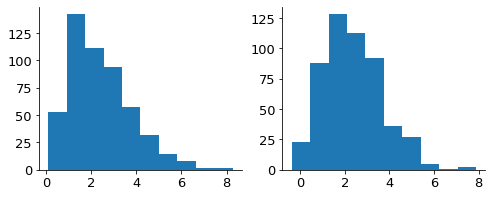

In [22]:
plt.subplots(1,2,figsize=(8,3))
plt.subplot(121)
plt.hist(ons)
plt.subplot(122)
plt.hist(offs)

In [23]:
def cropPSTH(x):
    x[hffm.trange_x<0] = np.nan
    x[hffm.trange_x>.2] = np.nan
    return x

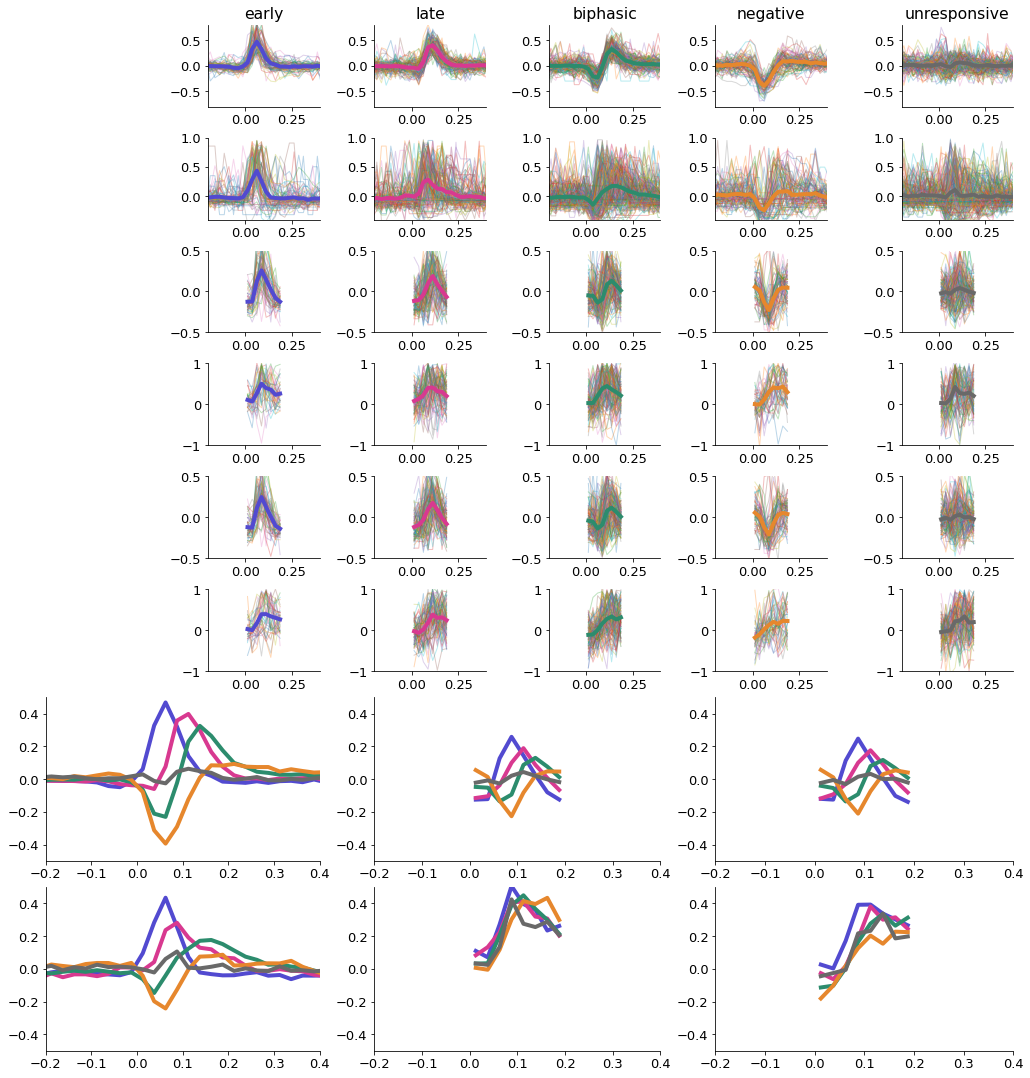

In [24]:
fig = plt.figure(constrained_layout=True, figsize=(14.2,16))
spec = gridspec.GridSpec(nrows=11, ncols=6, figure=fig)

ax_early_sacc = fig.add_subplot(spec[0,1])
ax_early_Rc = fig.add_subplot(spec[1,1])
ax_early_gSn_on = fig.add_subplot(spec[2,1])
ax_early_sSn_on = fig.add_subplot(spec[3,1])
ax_early_gSn_off = fig.add_subplot(spec[4,1])
ax_early_sSn_off = fig.add_subplot(spec[5,1])

ax_late_sacc = fig.add_subplot(spec[0,2])
ax_late_Rc = fig.add_subplot(spec[1,2])
ax_late_gSn_on = fig.add_subplot(spec[2,2])
ax_late_sSn_on = fig.add_subplot(spec[3,2])
ax_late_gSn_off = fig.add_subplot(spec[4,2])
ax_late_sSn_off = fig.add_subplot(spec[5,2])

ax_biphasic_sacc = fig.add_subplot(spec[0,3])
ax_biphasic_Rc = fig.add_subplot(spec[1,3])
ax_biphasic_gSn_on = fig.add_subplot(spec[2,3])
ax_biphasic_sSn_on = fig.add_subplot(spec[3,3])
ax_biphasic_gSn_off = fig.add_subplot(spec[4,3])
ax_biphasic_sSn_off = fig.add_subplot(spec[5,3])

ax_negative_sacc = fig.add_subplot(spec[0,4])
ax_negative_Rc = fig.add_subplot(spec[1,4])
ax_negative_gSn_on = fig.add_subplot(spec[2,4])
ax_negative_sSn_on = fig.add_subplot(spec[3,4])
ax_negative_gSn_off = fig.add_subplot(spec[4,4])
ax_negative_sSn_off = fig.add_subplot(spec[5,4])

ax_unresp_sacc = fig.add_subplot(spec[0,5])
ax_unresp_Rc = fig.add_subplot(spec[1,5])
ax_unresp_gSn_on = fig.add_subplot(spec[2,5])
ax_unresp_sSn_on = fig.add_subplot(spec[3,5])
ax_unresp_gSn_off = fig.add_subplot(spec[4,5])
ax_unresp_sSn_off = fig.add_subplot(spec[5,5])

ax_sacc = fig.add_subplot(spec[6:8,0:2])
ax_Rc = fig.add_subplot(spec[8:10,0:2])
ax_gSn_on = fig.add_subplot(spec[6:8,2:4])
ax_sSn_on = fig.add_subplot(spec[8:10,2:4])
ax_gSn_off = fig.add_subplot(spec[6:8,4:6])
ax_sSn_off = fig.add_subplot(spec[8:10,4:6])

sacc_panels = [ax_early_sacc,ax_late_sacc,ax_biphasic_sacc,ax_negative_sacc,ax_unresp_sacc]
Rc_panels = [ax_early_Rc,ax_late_Rc,ax_biphasic_Rc,ax_negative_Rc,ax_unresp_Rc]
gSn_on_panels = [ax_early_gSn_on,ax_late_gSn_on,ax_biphasic_gSn_on,ax_negative_gSn_on,ax_unresp_gSn_on]
sSn_on_panels = [ax_early_sSn_on,ax_late_sSn_on,ax_biphasic_sSn_on,ax_negative_sSn_on,ax_unresp_sSn_on]
gSn_off_panels = [ax_early_gSn_off,ax_late_gSn_off,ax_biphasic_gSn_off,ax_negative_gSn_off,ax_unresp_gSn_off]
sSn_off_panels = [ax_early_sSn_off,ax_late_sSn_off,ax_biphasic_sSn_off,ax_negative_sSn_off,ax_unresp_sSn_off]

cnames = ['early','late','biphasic','negative','unresponsive']
for c, name in enumerate(cnames):
    sacc_panel = sacc_panels[c]
    Rc_panel = Rc_panels[c]
    gSn_on_panel = gSn_on_panels[c]
    sSn_on_panel = sSn_on_panels[c]
    gSn_off_panel = gSn_off_panels[c]
    sSn_off_panel = sSn_off_panels[c]
    
    data = hffm.data[hffm.data['movcluster']==name]
    
    for x in data['pref_gazeshift_psth']:
        sacc_panel.plot(hffm.trange_x, x, linewidth=1, alpha=0.3)
    sacc = np.mean(flatten_series(data['pref_gazeshift_psth']),0)
    sacc_panel.plot(hffm.trange_x, sacc, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    sacc_panel.set_xlim([-0.2,0.4]); sacc_panel.set_ylim([-0.8,0.8])
    sacc_panel.set_title(name)
    
    for x in data['norm_Rc_psth']:
        Rc_panel.plot(hffm.trange_x, x, linewidth=1, alpha=0.3)
    revcheck = np.nanmean(flatten_series(data['norm_Rc_psth']),0)
    Rc_panel.plot(hffm.trange_x, revcheck, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    Rc_panel.set_xlim([-0.2,0.4]); Rc_panel.set_ylim([-0.4,1])
    
    for x in data['norm_Sn_background_on']:
        gSn_on_panel.plot(hffm.trange_x, cropPSTH(x), linewidth=1, alpha=0.3)
    gSn_on = cropPSTH(np.nanmean(flatten_series(data['norm_Sn_background_on']),0))
    gSn_on_panel.plot(hffm.trange_x, gSn_on, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    gSn_on_panel.set_xlim([-0.2,0.4]); gSn_on_panel.set_ylim([-0.5,0.5])
    
    for x in data['norm_Sn_selective_on'][data['has_on_Sn_selective_resp']==True]:
        sSn_on_panel.plot(hffm.trange_x, cropPSTH(x), linewidth=1, alpha=0.3)
    sSn_on = cropPSTH(np.nanmean(flatten_series(data['norm_Sn_selective_on'][data['has_on_Sn_selective_resp']==True]),0))
    sSn_on_panel.plot(hffm.trange_x, sSn_on, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    sSn_on_panel.set_xlim([-0.2,0.4]); sSn_on_panel.set_ylim([-1,1])
    
    for x in data['norm_Sn_background_off']:
        gSn_off_panel.plot(hffm.trange_x, cropPSTH(x), linewidth=1, alpha=0.3)
    gSn_off = cropPSTH(np.nanmean(flatten_series(data['norm_Sn_background_off']),0))
    gSn_off_panel.plot(hffm.trange_x, gSn_off, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    gSn_off_panel.set_xlim([-0.2,0.4]); gSn_off_panel.set_ylim([-0.5,0.5])
    
    for x in data['norm_Sn_selective_off'][data['has_off_Sn_selective_resp']==True]:
        sSn_off_panel.plot(hffm.trange_x, cropPSTH(x), linewidth=1, alpha=0.3)
    sSn_off = cropPSTH(np.nanmean(flatten_series(data['norm_Sn_selective_off'][data['has_off_Sn_selective_resp']==True]),0))
    sSn_off_panel.plot(hffm.trange_x, sSn_off, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    sSn_off_panel.set_xlim([-0.2,0.4]); sSn_off_panel.set_ylim([-1,1])
    
    ax_sacc.plot(hffm.trange_x, sacc, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    ax_Rc.plot(hffm.trange_x, revcheck, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    ax_gSn_on.plot(hffm.trange_x, gSn_on, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    ax_sSn_on.plot(hffm.trange_x, sSn_on, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    ax_gSn_off.plot(hffm.trange_x, gSn_off, color=ltdk.cmap_movclusts[c+1], linewidth=4)
    ax_sSn_off.plot(hffm.trange_x, sSn_off, color=ltdk.cmap_movclusts[c+1], linewidth=4)

ax_sacc.set_xlim([-0.2,0.4]); ax_sacc.set_ylim([-0.5,0.5])
ax_Rc.set_xlim([-0.2,0.4]); ax_Rc.set_ylim([-0.5,0.5])
ax_gSn_on.set_xlim([-0.2,0.4]); ax_gSn_on.set_ylim([-0.5,0.5])
ax_sSn_on.set_xlim([-0.2,0.4]); ax_sSn_on.set_ylim([-0.5,0.5])
ax_gSn_off.set_xlim([-0.2,0.4]); ax_gSn_off.set_ylim([-0.5,0.5])
ax_sSn_off.set_xlim([-0.2,0.4]); ax_sSn_off.set_ylim([-0.5,0.5])

fig.savefig('/home/niell_lab/Desktop/March2022_eyemov_summary/fig4.pdf')